In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
from dateutil.relativedelta import relativedelta
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
import sqlite3
db_filename = './Resources/hawaii.sqlite'
newline_indent = '\n   '
db=sqlite3.connect(db_filename)
db.text_factory = str
cur = db.cursor()
result = cur.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()
table_names = sorted(list(zip(*result))[0])
print ("\ntables are:"+newline_indent+newline_indent.join(table_names))
for table_name in table_names:
    result = cur.execute("PRAGMA table_info('%s')" % table_name).fetchall()
    column_names = list(zip(*result))[1]
    print (("\ncolumn names for %s:" % table_name)
           +newline_indent
           +(newline_indent.join(column_names)))
db.close()
print ("\nexiting.")


tables are:
   measurement
   station

column names for measurement:
   id
   station
   date
   prcp
   tobs

column names for station:
   id
   station
   name
   latitude
   longitude
   elevation

exiting.


In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fd8217aef10>,
 'prcp': 0.08,
 'date': '2010-01-01',
 'id': 1,
 'tobs': 65.0,
 'station': 'USC00519397'}

In [12]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fd8217ca850>,
 'longitude': -157.8168,
 'latitude': 21.2716,
 'elevation': 3.0,
 'id': 1,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US'}

# Exploratory Precipitation Analysis

In [22]:
# Find the most recent date in the data set.

max_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

print(max_date)
#for q in recent_date:
#    print(q.date)
    


('2017-08-23',)


In [23]:
max_date = max_date[0]
print(max_date)

2017-08-23


In [24]:
#latest_twelve = dt.datetime(2017, 8, 23) - timedelta(days = 366)
max_date1 = dt.datetime.strptime(max_date, '%Y-%m-%d')
latest_twelve = max_date1 - relativedelta(years=1)
print(latest_twelve)

2016-08-23 00:00:00


In [25]:
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > latest_twelve).order_by(Measurement.date).all()
for p in results:
    print(p)

('2016-08-24', 0.08)
('2016-08-24', 2.15)
('2016-08-24', 2.28)
('2016-08-24', None)
('2016-08-24', 1.22)
('2016-08-24', 2.15)
('2016-08-24', 1.45)
('2016-08-25', 0.08)
('2016-08-25', 0.08)
('2016-08-25', 0.0)
('2016-08-25', 0.0)
('2016-08-25', 0.21)
('2016-08-25', 0.06)
('2016-08-25', 0.11)
('2016-08-26', 0.0)
('2016-08-26', 0.03)
('2016-08-26', 0.02)
('2016-08-26', 0.04)
('2016-08-26', 0.0)
('2016-08-26', 0.01)
('2016-08-27', 0.0)
('2016-08-27', 0.18)
('2016-08-27', 0.02)
('2016-08-27', 0.0)
('2016-08-27', 0.12)
('2016-08-27', None)
('2016-08-28', 0.01)
('2016-08-28', 0.14)
('2016-08-28', 0.14)
('2016-08-28', 0.14)
('2016-08-28', 0.6)
('2016-08-28', 2.07)
('2016-08-29', 0.0)
('2016-08-29', 0.17)
('2016-08-29', 0.04)
('2016-08-29', None)
('2016-08-29', 0.0)
('2016-08-29', 0.35)
('2016-08-29', 0.9)
('2016-08-30', 0.0)
('2016-08-30', 0.0)
('2016-08-30', 0.02)
('2016-08-30', 0.0)
('2016-08-30', 0.0)
('2016-08-30', 0.05)
('2016-08-31', 0.13)
('2016-08-31', 0.1)
('2016-08-31', None)
('2016-

('2017-06-12', 0.19)
('2017-06-12', 0.35)
('2017-06-12', 0.14)
('2017-06-12', 0.24)
('2017-06-12', 0.81)
('2017-06-13', 0.0)
('2017-06-13', 0.36)
('2017-06-13', 0.1)
('2017-06-13', None)
('2017-06-13', 0.03)
('2017-06-13', 0.24)
('2017-06-13', 0.65)
('2017-06-14', 0.0)
('2017-06-14', 0.27)
('2017-06-14', 0.21)
('2017-06-14', None)
('2017-06-14', 0.06)
('2017-06-14', 0.22)
('2017-06-14', 0.81)
('2017-06-15', 0.0)
('2017-06-15', 0.17)
('2017-06-15', 0.3)
('2017-06-15', None)
('2017-06-15', 0.0)
('2017-06-15', 0.55)
('2017-06-15', 1.69)
('2017-06-16', 0.0)
('2017-06-16', 0.02)
('2017-06-16', 0.02)
('2017-06-16', None)
('2017-06-16', 0.0)
('2017-06-16', 0.06)
('2017-06-16', 0.1)
('2017-06-17', 0.0)
('2017-06-17', 0.35)
('2017-06-17', 0.02)
('2017-06-17', 0.0)
('2017-06-17', 0.07)
('2017-06-17', 0.1)
('2017-06-18', 0.05)
('2017-06-18', 0.25)
('2017-06-18', 0.18)
('2017-06-18', 0.0)
('2017-06-18', 0.24)
('2017-06-18', 0.7)
('2017-06-19', 0.0)
('2017-06-19', 0.05)
('2017-06-19', 0.19)
('2017-

In [28]:
epa_df = pd.DataFrame(results)


In [29]:
#df = pd.DataFrame(results, columns=['date', 'prcp'])
epa_df.set_index('date', inplace=True, )
df = df.dropna()
#df = df.sort_index()
#df.head(10)

In [23]:
gr_df = df.groupby(['date'])
gr_sum = gr_df.sum()
gr_sum.head()

,prcp
date,
2016-08-24,9.33
2016-08-25,0.54
2016-08-26,0.10
2016-08-27,0.32
2016-08-28,3.10


Text(0.5, 1.0, 'Inches vs Date')

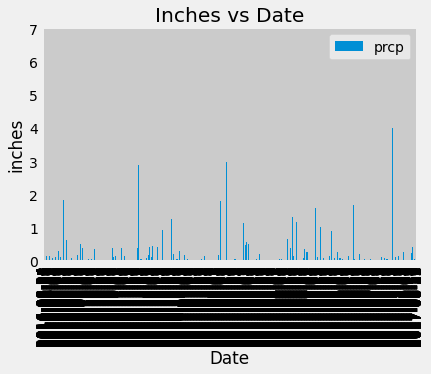

In [30]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
#df.iloc[::-1].plot.bar(title="Precipitation")
df.plot.bar()
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('inches')
plt.title('Inches vs Date')
#plt.tight_layout()
#plt.show()



In [25]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [35]:
# Design a query to calculate the total number stations in the dataset
#first_row = session.query(Station).first()
#first_row.__dict__
session.query(Station).count()


9

In [36]:
session.query(func.count(Measurement.station)).all()

[(19550)]

In [37]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
from sqlalchemy import asc, desc

sta_count = session.query(Measurement.station, func.count(Measurement.station).label('total')).group_by(Measurement.station).order_by(desc(func.count(Measurement.station))).all()
#sta_ordered = sta_count.order_by(Measurement.total.desc)
for sta in sta_count:
    print(sta)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [38]:
sta_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [46]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
tmp_low = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
tmp_low = tmp_low[0][0]
print(tmp_low)

tmp_high = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
tmp_high = tmp_high[0][0]
print(tmp_high)

tmp_avg = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
tmp_avg = tmp_avg[0][0]
print(tmp_avg)


54.0
85.0
71.66378066378067


Text(0.5, 1.0, 'Station USC00519281 Temp Frequency')

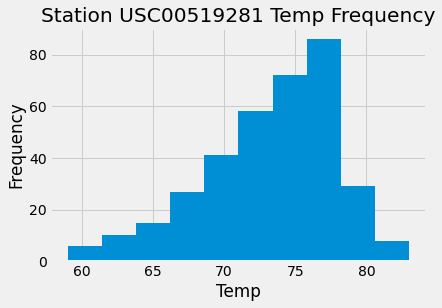

In [51]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
top_sta = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= latest_twelve.date()).filter(Measurement.date <= max_date1.date()).filter(Measurement.station == 'USC00519281').all()

df = pd.DataFrame(top_sta)
df.set_index('date', inplace = True)
top_sta_df = df.dropna()
top_sta_df.head()

top_sta_df.hist()
plt.xlabel('Temp')
plt.ylabel('Frequency')
plt.title('Station USC00519281 Temp Frequency')

# Close session

In [52]:
# Close Session
session.close()